In [1]:
%matplotlib widget

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the full dataset and display it
dataset = load_iris()
names = dataset.feature_names
data = dataset.data
target = dataset.target

In [3]:
def feature_engineer_polynomial(orgdata, order):
    data = np.array(orgdata)
    for i in range(2, order+1): # add increasing powers of features = x^2 + x^3 + ... + x^n
        data = np.hstack([data, orgdata ** i])
    return data

In [4]:
# preprocess the data to remove the third category so we have binary classification for now
index = np.searchsorted(target, 2)

data = data[:index]
target = target[:index].astype(np.float64) # convert to float64

data = data[:,:2] # use only 2 features
names = names[:2] # use only 2 features

terms = 20 # 20 terms to see how overfitting looks like 
data = feature_engineer_polynomial(data, terms) # add extra polynomial terms to features
# x^2 + x^3 + ... + x^20 for each feature

print(data)
print(names)
print(target)

print("Data: ", data.shape, data.dtype)
print("Target:", target.shape, target.dtype)

[[5.10000000e+00 3.50000000e+00 2.60100000e+01 ... 2.17416671e+10
  1.41710987e+14 7.60958350e+10]
 [4.90000000e+00 3.00000000e+00 2.40100000e+01 ... 1.16226147e+09
  6.36680576e+13 3.48678440e+09]
 [4.70000000e+00 3.20000000e+00 2.20900000e+01 ... 3.96140813e+09
  2.76666871e+13 1.26765060e+10]
 ...
 [6.20000000e+00 2.90000000e+00 3.84400000e+01 ... 6.10326125e+08
  7.04423426e+15 1.76994576e+09]
 [5.10000000e+00 2.50000000e+00 2.60100000e+01 ... 3.63797881e+07
  1.41710987e+14 9.09494702e+07]
 [5.70000000e+00 2.80000000e+00 3.24900000e+01 ... 3.13330445e+08
  1.31068133e+15 8.77325246e+08]]
['sepal length (cm)', 'sepal width (cm)']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Data:  (100, 40) float64
Target: (100,) float64


In [5]:
def feature_scale(data_unscaled, scaled=True):
    if scaled == False:
        return data_unscaled

    mu = np.mean(data_unscaled, axis=0)
    std = np.std(data_unscaled, axis=0)

    data_scaled = np.array(data_unscaled)
    data_scaled = (data_scaled - mu) / std
    # z score normalization
    
    return data_scaled

data = feature_scale(data, scaled=False) # disable feature scaling for displaying boundary lines

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,penalty=None,max_iter=10000).fit(data, target)
scikit_predict = clf.predict(data)

errors = np.sum(np.abs(scikit_predict - target.reshape(-1)))
print("Misclassifications:", errors)

Misclassifications: 0.0


In [7]:
frange = 20
samples = 500
gap = 0.2

mi = np.min(data, axis=0)
mx = np.max(data, axis=0)

x = np.linspace(mi[0]-gap,mx[0]+gap,samples)
y = np.linspace(mi[1]-gap,mx[1]+gap,samples)
nx, ny = np.meshgrid(x, y)
xpoints = np.array([nx.ravel(),ny.ravel()]).T

index = np.searchsorted(target, 1)
data0 = data[:index,:]
data1 = data[index:,:]

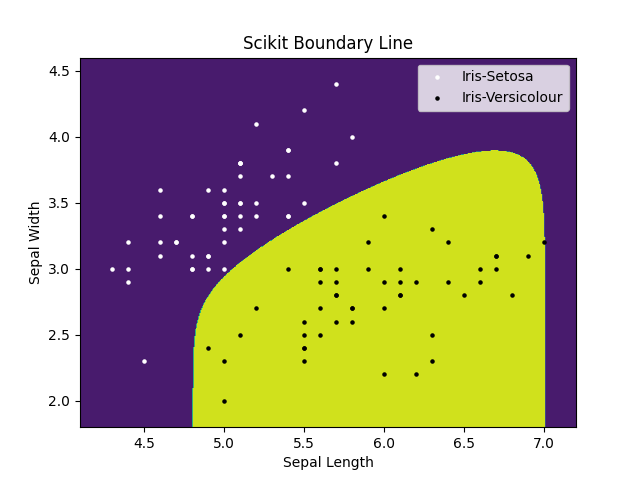

In [8]:
xpoints = feature_engineer_polynomial(xpoints, terms) # feature engineer extra polynomial terms to generated grid
scikit_classification = clf.predict(xpoints).reshape((samples,-1)) # use scikit to predict our new grid

fig, ax = plt.subplots()

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Scikit Boundary Line")
ax.contourf(nx,ny,scikit_classification)
ax.scatter(data0[:,0],data0[:,1],c='white',label="Iris-Setosa",s=5)
ax.scatter(data1[:,0],data1[:,1],c='black',label="Iris-Versicolour",s=5)
ax.legend()

Wow, the regression model is now able to generate curved boundary lines. This is because we added fake polynomial features based on the original features. This particular graph is of degree 20. $x^{2}+x^{3}+...+x^{20}$. But if we look in the previous labs, even a straight line fits well. This notion of fitting extremely well might actually perform worse than simplify fitting the model based on lower order polynomials or even a line. This is called overfitting. In some rare cases, overfitting does become a huge problem. The solution then is to reduce the model complexity by lowering the number of features or using lower order polynomial features or even a simpler model. Let's do L2 regularization which is adding the sum of squares of weights to the cost function.

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1,max_iter=10000,penalty='l2',C=2).fit(data, target) # use l2 regularization, choose C = regularization strength
scikit_predict = clf.predict(data)

errors = np.sum(np.abs(scikit_predict - target.reshape(-1)))
print("Misclassifications:", errors)

Misclassifications: 0.0


In [10]:
frange = 20
samples = 500
gap = 0.2

mi = np.min(data, axis=0)
mx = np.max(data, axis=0)

x = np.linspace(mi[0]-gap,mx[0]+gap,samples)
y = np.linspace(mi[1]-gap,mx[1]+gap,samples)
nx, ny = np.meshgrid(x, y)
xpoints = np.array([nx.ravel(),ny.ravel()]).T

index = np.searchsorted(target, 1)
data0 = data[:index,:]
data1 = data[index:,:]

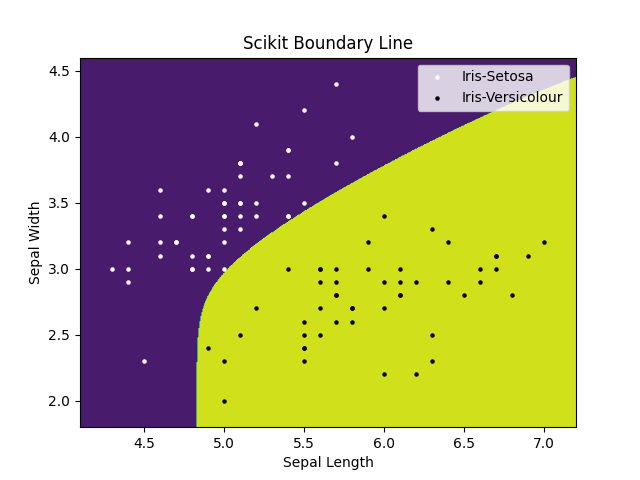

In [11]:
xpoints = feature_engineer_polynomial(xpoints, terms) # feature engineer extra polynomial terms to generated grid
scikit_classification = clf.predict(xpoints).reshape((samples,-1)) # use scikit to predict our new grid

fig, ax = plt.subplots()

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Scikit Boundary Line")
ax.contourf(nx,ny,scikit_classification)
ax.scatter(data0[:,0],data0[:,1],c='white',label="Iris-Setosa",s=5)
ax.scatter(data1[:,0],data1[:,1],c='black',label="Iris-Versicolour",s=5)
ax.legend()

Here the boundary line is less tight since we are using high regularization. In reality we saw that the line also works. Therefore, it is up to us to define how the model should fit the data points and how much we allow the model to fit the data properly. We could've went with tight line or a straight line as well. In all these cases, it's important to consider what data could be predicted by the model and knowing more about the data will help us make better decisions in regularizing. 